<a href="https://colab.research.google.com/github/pvanand07/Retail-Sales-Prediction-Regression/blob/master/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction - Regression



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### Submitted By - Anand Siva P V


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/pvanand07/Retail-Sales-Prediction-Regression

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Dataset Loading

In [4]:
def Load_Dataset():
  df = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/Rossmann Stores Data.csv')
  df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
  return df,df2

In [5]:
def merge_data(df,df2):
  df.set_index('Store', inplace=True)
  df2.set_index('Store', inplace=True)
  df_m = df.join(df2, on='Store')
  return df_m

In [6]:
df,df2 = Load_Dataset()
df_m = merge_data(df,df2)

In [7]:
# Data pre-processing
def pre_processing(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = pd.to_datetime(df_c['Date']).dt.week
  df_c['month'] = pd.to_datetime(df_c['Date']).dt.month
  df_c['year'] = pd.to_datetime(df_c['Date']).dt.year
  df_c.drop(['Date','StateHoliday','Customers'], axis=1, inplace=True)#,'Customers'


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='object').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [8]:
# Load Dataset
df,df2 = Load_Dataset()
print(df.shape)
df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

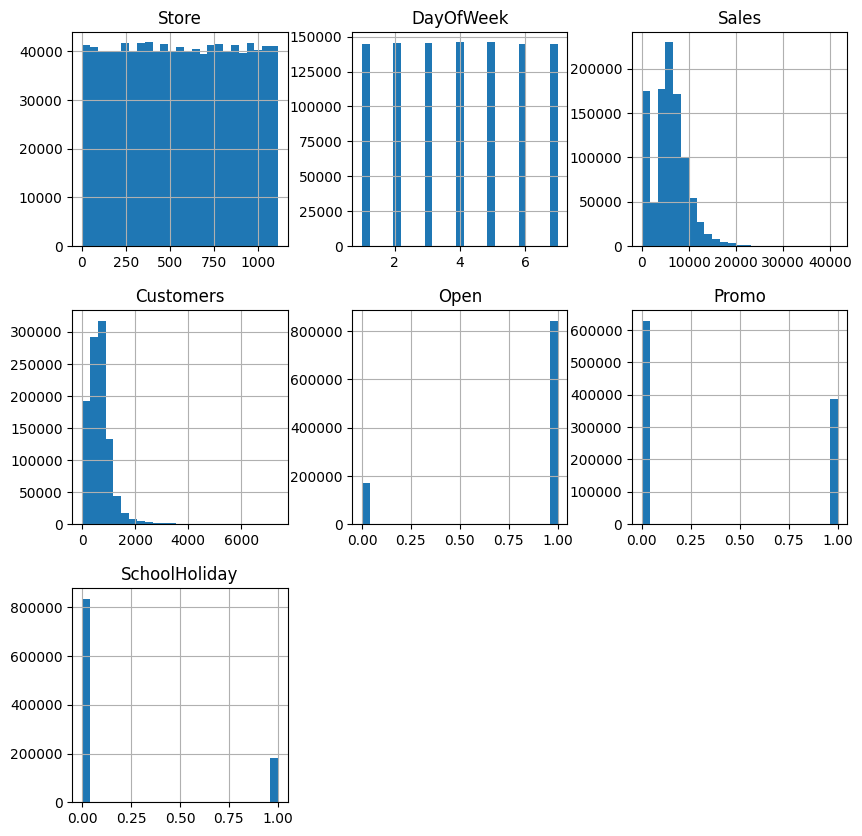

In [9]:
# PLot large histogram of df
df.hist(bins=25, figsize=(10,10))

In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
print(df2.shape)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

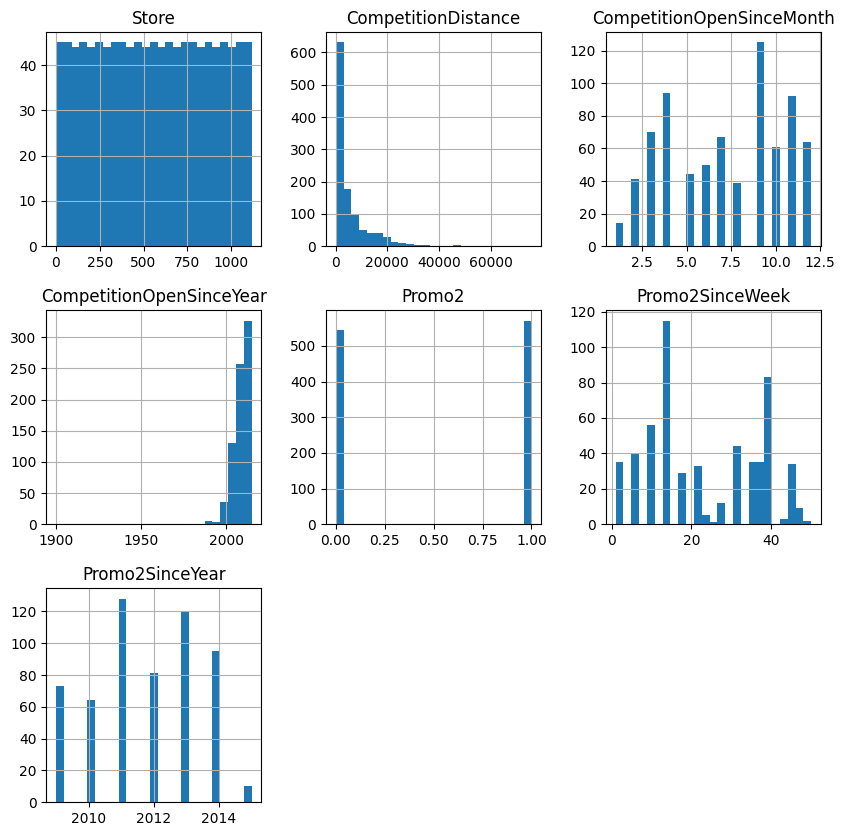

In [11]:
df2.hist(bins=25, figsize=(10,10))

In [12]:
df2['StoreType'].value_counts(),df2['Store'].value_counts()


(a    602
 d    348
 c    148
 b     17
 Name: StoreType, dtype: int64,
 1       1
 742     1
 748     1
 747     1
 746     1
        ..
 378     1
 379     1
 380     1
 381     1
 1115    1
 Name: Store, Length: 1115, dtype: int64)

In [13]:
def merge_data(df,df2):
  df.set_index('Store', inplace=True)
  df2.set_index('Store', inplace=True)
  df = df.join(df2, on='Store')
  return df_m

### Dataset First View

In [21]:
# Dataset First Look
df_m.sample(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
806,7,2013-05-19,0,0,0,0,0,0,d,a,260.0,NaN,NaN,1,44.0,2010.0,"Feb,May,Aug,Nov"
317,1,2015-06-15,7963,668,1,1,0,0,d,a,3140.0,7.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
448,5,2014-10-31,11379,1016,1,0,0,0,a,c,3970.0,9.0,2009.0,0,NaN,NaN,NaN
845,2,2013-09-24,4729,397,1,1,0,0,d,a,7860.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
993,4,2015-05-28,7138,732,1,0,0,0,d,c,3460.0,10.0,2013.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The dataset has {df_m.shape[0]} rows and {df_m.shape[1]} columns')

### Dataset Information

In [ ]:
# Dataset Info
df_m.info()

### Building base model

In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
# Build the decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15, random_state=0)
classifier.fit(X_train, y_train)


In [ ]:
y_predicted = classifier.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
y_test[:10]

In [ ]:
accuracy_score(y_test, y_predicted) * 100

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]


In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=10, max_leaf_nodes=10)


classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = pre_processing(df_m)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
regressor = SGDRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
list(zip(y_pred, y_test))

### Data Cleaning

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print('The dataset has:',df_m.duplicated().sum(),'duplicate rows')

The dataset has: 595 duplicate rows


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
missing_values = df_m.isna().sum().sort_values(ascending=False)
print('Features with missing values','Count\n')
missing_values[missing_values > 0]

Features with missing values Count



PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64

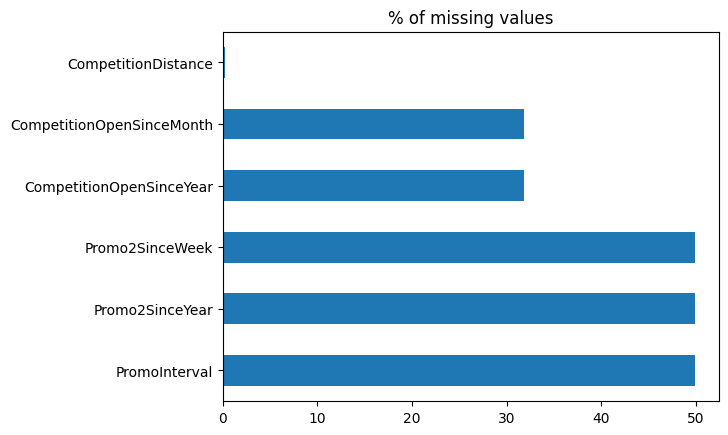

In [16]:
# Visualizing the % of missing values
(missing_values[missing_values > 0]*100/df_m.shape[0]).plot(kind='barh')
plt.title('% of missing values')
plt.show()

### What did you know about your dataset?

The dataset represents historical sales data for 1,115 Rossmann stores. The dataset contains 1,017,209 entries (rows) and 17 features (columns). The dataset contains 595 duplicate entries and 5 features with more than 30% missing values.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df_m.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
df_m.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

The dataset includes the following features:

- **Id**: Represents a unique identifier for a combination of Store and Date within the test set.
- **Store**: A unique identifier for each store.
- **Sales**: The turnover (sales) for a given day, which is the target variable to be predicted.
- **Customers**: The number of customers on a given day.
- **Open**: An indicator of whether the store was open: 0 = closed, 1 = open.
- **StateHoliday**: Indicates a state holiday. Most stores are closed on state holidays, except for a few exceptions. The values are: a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
- **SchoolHoliday**: Indicates whether the (Store, Date) was affected by the closure of public schools.
- **StoreType**: Differentiates between four different store models: a, b, c, d.
- **Assortment**: Describes the assortment level of the store: a = basic, b = extra, c = extended.
- **CompetitionDistance**: The distance in meters to the nearest competitor store.
- **CompetitionOpenSince[Month/Year]**: Provides an approximate year and month when the nearest competitor store was opened.
- **Promo**: Indicates whether a store is running a promotion on a given day.
- **Promo2**: Represents a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
- **Promo2Since[Year/Week]**: Describes the year and calendar week when the store started participating in Promo2.
- **PromoInterval**: Describes the consecutive intervals when Promo2 is started, specifying the months in which the promotion is started anew. For example, "Feb,May,Aug,Nov" means the promotion starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
df_m.nunique()

DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Checking value counts during 'open' and 'closed'
print(df_m['Open'].value_counts())

# Checking sum of sales during 'open' and 'closed'
print(df_m[['Open','Sales']].groupby(['Open']).sum())

1    844392
0    172817
Name: Open, dtype: int64
           Sales
Open            
0              0
1     5873180623


- Since there are no sales when the stores are 'closed' we can drop the values where store is 'closed'.
- We can drop the 'Open' column since it contains only 1 unique value.

In [76]:
# Selecting only the rows with Open = 1
df_m2 = df_m[df_m['Open'] == 1].drop('Open', axis=1).copy()

# Converting Date to Datetime for analysis and feature engineering
df_m2['Date'] = pd.to_datetime(df_m2['Date'])

# We can also convert object Dtype to category for reduced memory usage
for col in df_m2.select_dtypes('object').columns:
  df_m2[col] = df_m2[col].astype('category')

In [77]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  category      
 6   SchoolHoliday              844392 non-null  int64         
 7   StoreType                  844392 non-null  category      
 8   Assortment                 844392 non-null  category      
 9   CompetitionDistance        842206 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 non-null  float64   

In [78]:
#checking number of unique values in each categorical column
[df_m2[col].value_counts() for col in df_m2.select_dtypes('category').columns]

[0    731342
 0    112140
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64,
 a    457077
 d    258774
 c    112978
 b     15563
 Name: StoreType, dtype: int64,
 a    444909
 c    391271
 b      8212
 Name: Assortment, dtype: int64,
 Jan,Apr,Jul,Oct     242411
 Feb,May,Aug,Nov      98005
 Mar,Jun,Sept,Dec     80669
 Name: PromoInterval, dtype: int64]

In [79]:
# Checking unique values in 'StateHoliday'
print(df_m2['StateHoliday'].unique())

['0', 'a', 'b', 'c', 0]
Categories (5, object): [0, '0', 'a', 'b', 'c']


It appears that the 'StateHoliday' column contains a mix of integer and string representations of the "0" value. This can cause the value counts to show duplicates.

In [80]:
# Replace all variations of "0" with a single representation
df_m2['StateHoliday'] = df_m2['StateHoliday'].replace(['0', 0], '0')

<Axes: >

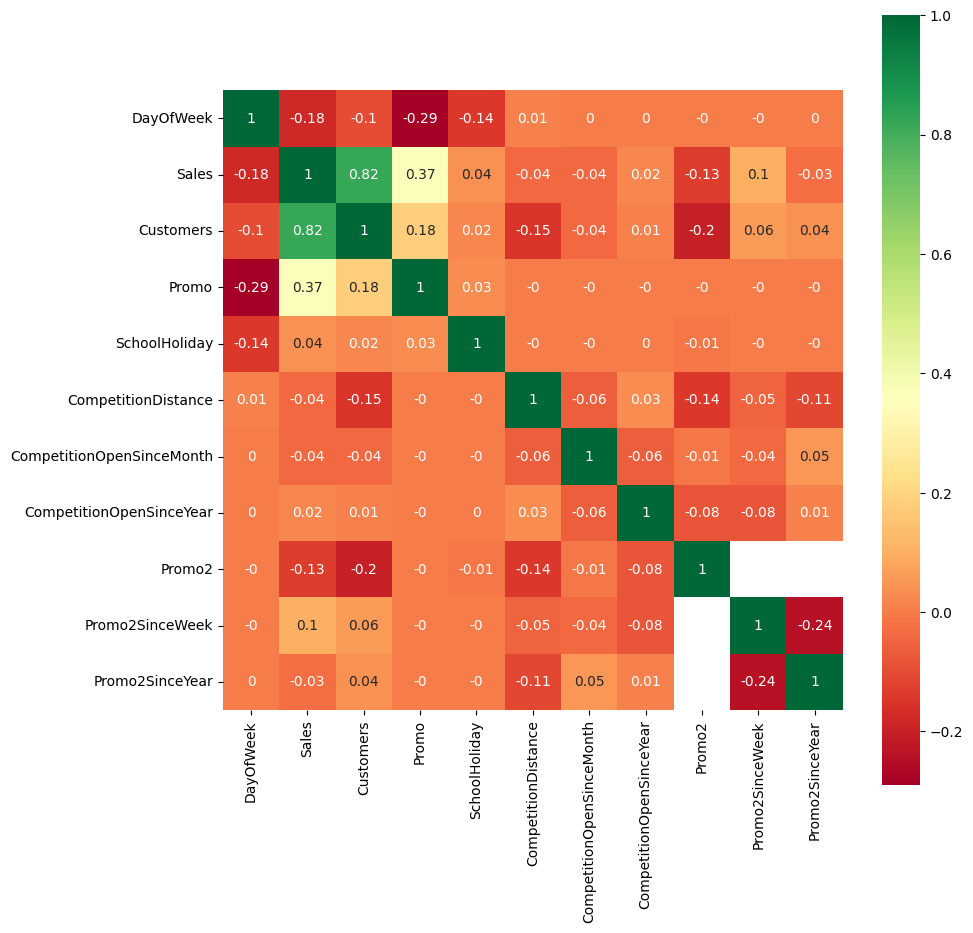

In [81]:
corr = df_m2.corr().round(2)
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', square=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)
X_train['label'] = y_train
X_test['label'] = y_test

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label ='label', problem_type="regression",eval_metric="r2").fit(X_train, presets="best_quality", time_limit=600)

In [ ]:
# With customers column
predictor.leaderboard(X_test, silent=True)

In [ ]:
predictor.leaderboard(X_test, silent=True)

In [1]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━